In [1]:
import xarray as xr

from pathlib import Path

In [3]:
# parameters
data_path = "../data/test_data/"

In [5]:
foci_data_files = list(sorted(Path(data_path).glob("FOCI/*.nc")))
display(foci_data_files)

[PosixPath('../data/test_data/FOCI/FOCI1.3-SW038_echam6_ATM_mm_2350-2359_geopoth_pl_monthly_50000.nc'),
 PosixPath('../data/test_data/FOCI/FOCI1.3-SW038_echam6_BOT_mm_2350-2359_slp_monthly_1.nc'),
 PosixPath('../data/test_data/FOCI/FOCI1.3-SW038_echam6_BOT_mm_2350-2359_tsw_monthly_1.nc')]

In [6]:
foci_ds = xr.open_mfdataset(foci_data_files)
foci_ds

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:  (time: 120, plev: 1, lat: 96, lon: 192)
Coordinates:
  * lat      (lat) float64 88.57 86.72 84.86 83.0 ... -83.0 -84.86 -86.72 -88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * plev     (plev) float64 5e+04
  * time     (time) object 2350-02-28 23:52:00 ... 2360-01-31 23:52:00
Data variables:
    geopoth  (time, plev, lat, lon) float32 dask.array<chunksize=(120, 1, 96, 192), meta=np.ndarray>
    slp      (time, lat, lon) float32 dask.array<chunksize=(120, 96, 192), meta=np.ndarray>
    tsw      (time, lat, lon) float32 dask.array<chunksize=(120, 96, 192), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.9 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    source:       ECHAM6
    institution:  Max Planck Institute for Meteorology
    history:      Wed May 18 14:28:37 2022: ncks -O -d time,1,120,1 /gxfs_wor...
    CDO:          Climate Data Operators version 1.9.9 (https://mpimet.mpg.de...
    NCO:          netCDF Operators version 4.9.3 (Homepage = http://nco.sf.ne...

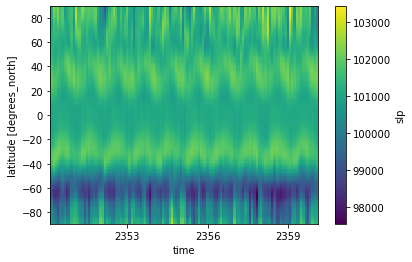

In [8]:
foci_ds.slp.mean("lon").plot(x="time", y="lat");

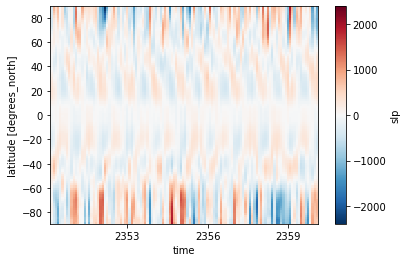

In [9]:
(foci_ds.slp - foci_ds.slp.mean("time")).mean("lon").plot(x="time", y="lat");

In [10]:
def southern_annular_mode(data_set, slp_name="SLP"):
    """Calculate the southern annular mode index.
    
    Parameters
    ----------
    data_set: xarray.DataSet
        Dataset containing a SLP field.
    slp_name: str
        Name of the Sea-Level Pressure field. Defaults to "SLP".
    
    Returns
    -------
    xarray.DataArray
        Time series containing the SAM index.
        
    """
    slp = data_set[slp_name]
    
    slp40S = slp.sel(lat=-40, method="nearest").mean("lon")
    slp65S = slp.sel(lat=-65, method="nearest").mean("lon")
    
    slp_diff = (slp40S - slp65S)
    
    SAM_index = (slp_diff - slp_diff.mean("time")) / slp_diff.std("time")
    SAM_index = SAM_index.rename("SAM")
    
    return SAM_index

In [12]:
foci_SAM = southern_annular_mode(foci_ds, slp_name="slp")
foci_SAM

<xarray.DataArray 'SAM' (time: 120)>
dask.array<truediv, shape=(120,), dtype=float32, chunksize=(120,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2350-02-28 23:52:00 ... 2360-01-31 23:52:00

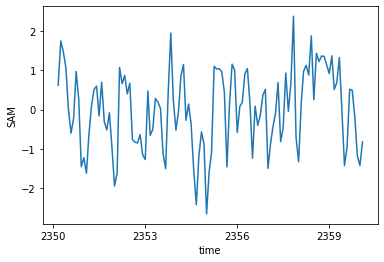

In [14]:
foci_SAM.plot();